# DMA 144 Final Project ~ Use of Force Incidents

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, tree
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.ensemble import RandomForestClassifier
def print_full(x):
    pd.set_option('display.max_columns',None)
    display(x)
    pd.reset_option('display.max_columns')

## EDA - cleaning

In [ ]:
force21 = pd.read_csv('force2021.csv')
civforce21 = pd.read_csv('civforce2021.csv')
force20 = pd.read_csv('force2020.csv')
civforce20 = pd.read_csv('civforce2020.csv')
force19 = pd.read_csv('force2019.csv')
civforce19 = pd.read_csv('civforce2019.csv')
force18 = pd.read_csv('force18.csv')
civforce18 = pd.read_csv('civforce18.csv')

All force datasets have many missing values in the 'IN_CUSTODY_REASON' feature

In [ ]:
force18.isna().sum()

INCIDENT_ID                 0
ORI                         0
INCIDENT_DATE_STR           0
INCIDENT_TIME_STR           0
CITY                        0
COUNTY                      0
STATE                       0
ZIP_CODE                    0
MULTIPLE_LOCATIONS          0
ON_K12_CAMPUS               0
ARREST_MADE                 0
CRIME_REPORT_FILED          0
CONTACT_REASON              0
IN_CUSTODY_REASON         583
NUM_INVOLVED_CIVILIANS      0
NUM_INVOLVED_OFFICERS       0
NUM_INVOLVED_AGENCIES       0
dtype: int64

In [ ]:
civforce18.isna().sum()

Incident_ID                                0
Civilian_Officer                           0
ORI                                        0
Gender                                     3
Race_Ethnic_Group                          3
Asian_Race                              2140
HI_Islander_Race                        2227
Age                                        3
Injured                                    0
Injury_Level                            1413
Injury_Type                             1413
Medical_Aid                             1413
Injury_From_Preexisting_Condition          0
Received_Force_Location                  802
Order_Of_Force_Specified                1562
Order_Of_Force_Str                      1587
Received_Force                             0
Received_Force_Type                      802
DISCHARGE_OF_FIREARM_INDIVIDUAL            0
DISCHARGE_OF_FIREARM_INCIDENT              0
CIVILIAN_Signs_Impairment_Disability    1565
CIVILIAN_Assaulted_Officer              1562
CIVILIAN_H

In [ ]:
def clean_force(dataset):
    dataset.drop('IN_CUSTODY_REASON', axis=1, inplace=True)
    dataset.drop(['NUM_INVOLVED_AGENCIES','CRIME_REPORT_FILED','ON_K12_CAMPUS','MULTIPLE_LOCATIONS'], 
                 axis=1, inplace=True)
    return 

def clean_civforce(dataset):
    dataset = dataset[['Incident_ID','Civilian_Officer','ORI','Gender','Race_Ethnic_Group','Age',
                         'Injured','Received_Force', 'DISCHARGE_OF_FIREARM_INDIVIDUAL','DISCHARGE_OF_FIREARM_INCIDENT']]
    new_data = dataset.copy()
    new_data.drop('ORI', axis=1, inplace=True)
    new_data.rename({'Incident_ID':'INCIDENT_ID'}, inplace=True,axis=1)
    return new_data
    
    

In [ ]:
clean_force(force21)
clean_force(force20)
clean_force(force19)
clean_force(force18)

In [ ]:
cforce21 = clean_civforce(civforce21)
cforce20 = clean_civforce(civforce20)
cforce19 = clean_civforce(civforce19)
cforce18 = clean_civforce(civforce18)

In [ ]:
total21 = cforce21.merge(force21, on = 'INCIDENT_ID')
total20 = cforce20.merge(force20, on = 'INCIDENT_ID')
total19 = cforce19.merge(force19, on = 'INCIDENT_ID')
total18 = cforce18.merge(force18, on = 'INCIDENT_ID')

In [ ]:
force_total = pd.concat([total21, total20, total19, total18]).fillna(0)

## EDA - feature engineering

In [ ]:
force_total['NUM_INVOLVED_TOTAL'] = force_total['NUM_INVOLVED_CIVILIANS'] + force_total['NUM_INVOLVED_OFFICERS']

In [ ]:
force_total['date'] = pd.to_datetime(force_total['INCIDENT_DATE_STR']).dt.date
force_total['time'] = pd.to_datetime(force_total['INCIDENT_TIME_STR']).dt.time

In [ ]:
force_total['year'] = [x.year for x in force_total['date']]
force_total['month'] = [x.month for x in force_total['date']]
force_total['day'] = [x.day for x in force_total['date']]
force_total['hour'] = [x.hour for x in force_total['time']]
force_total['minute'] = [x.minute for x in force_total['time']]

In [ ]:
force_total.drop(['INCIDENT_TIME_STR','INCIDENT_DATE_STR'],axis=1,inplace=True)

In [ ]:
force_total.columns

Index(['INCIDENT_ID', 'Civilian_Officer', 'Gender', 'Race_Ethnic_Group', 'Age',
       'Injured', 'Received_Force', 'DISCHARGE_OF_FIREARM_INDIVIDUAL',
       'DISCHARGE_OF_FIREARM_INCIDENT', 'ORI', 'CITY', 'COUNTY', 'STATE',
       'ZIP_CODE', 'ARREST_MADE', 'CONTACT_REASON', 'NUM_INVOLVED_CIVILIANS',
       'NUM_INVOLVED_OFFICERS', 'NUM_INVOLVED_TOTAL', 'date', 'time', 'year',
       'month', 'day', 'hour', 'minute'],
      dtype='object')

## EDA - Data visualizations 

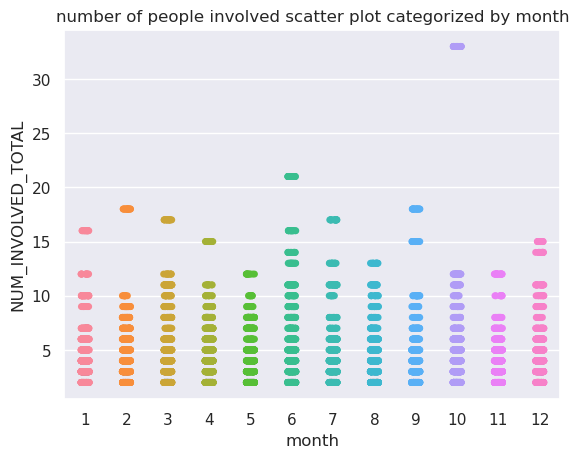

In [ ]:
sns.stripplot(data=force_total, x='month', y='NUM_INVOLVED_TOTAL').set(title='number of people involved scatter plot categorized by month');

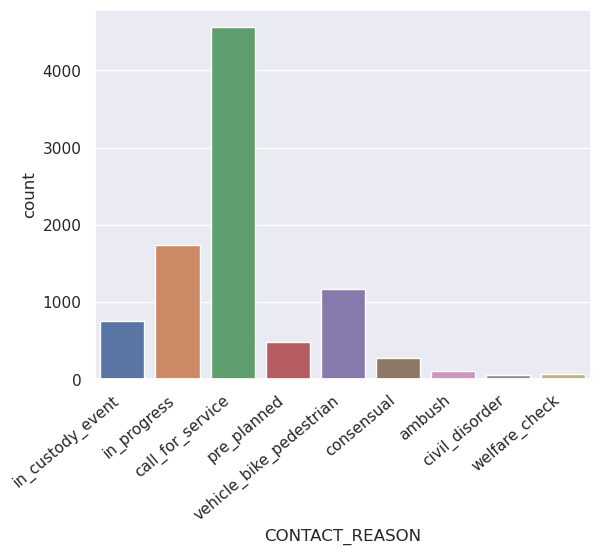

In [ ]:
ax = sns.countplot(data=force_total, x='CONTACT_REASON')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

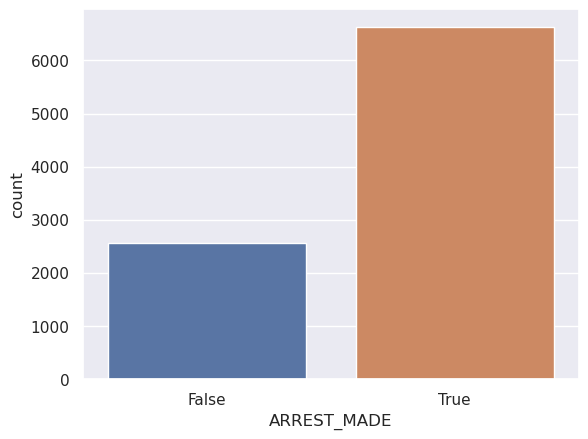

In [ ]:
sns.countplot(data=force_total, x='ARREST_MADE');
#density, histogram 

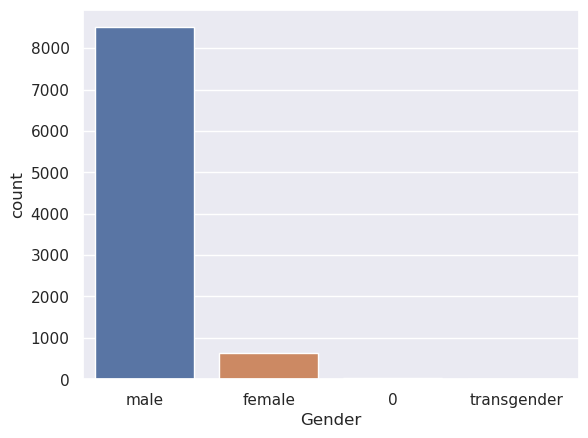

In [ ]:
sns.countplot(data=force_total, x='Gender');

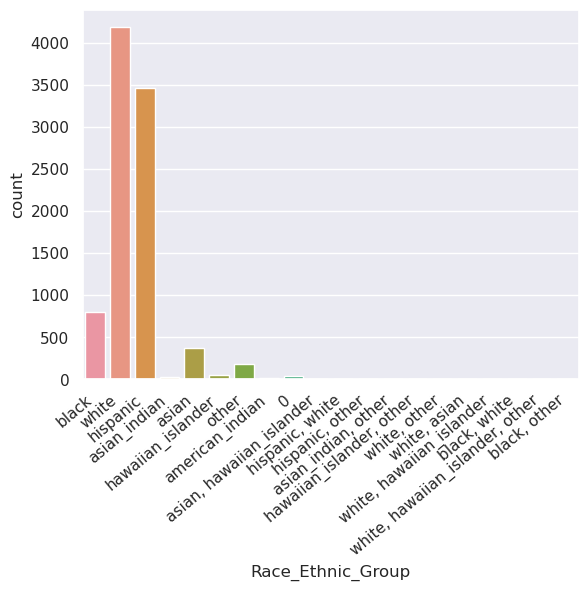

In [ ]:
ax = sns.countplot(data=force_total, x='Race_Ethnic_Group')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

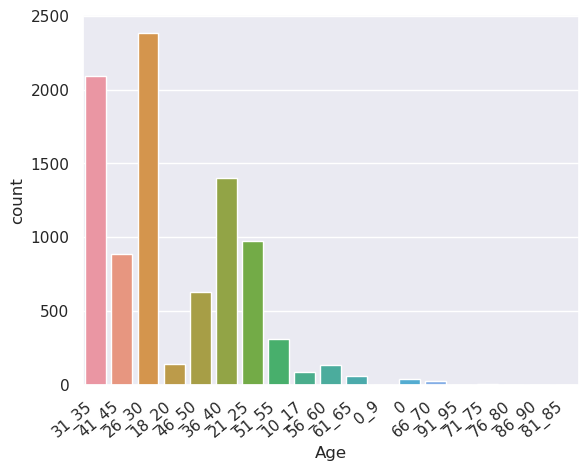

In [ ]:
ax = sns.countplot(data=force_total, x='Age')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");
#group by 'youth', 'senior', ... --> google
#<30 youth, 30-60 middle aged, >60 senior

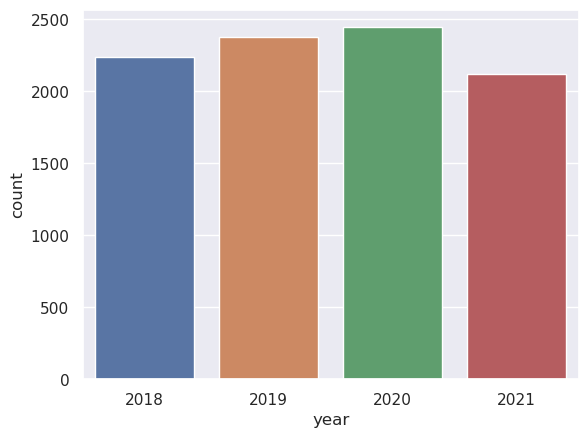

In [ ]:
sns.countplot(data=force_total, x='year');

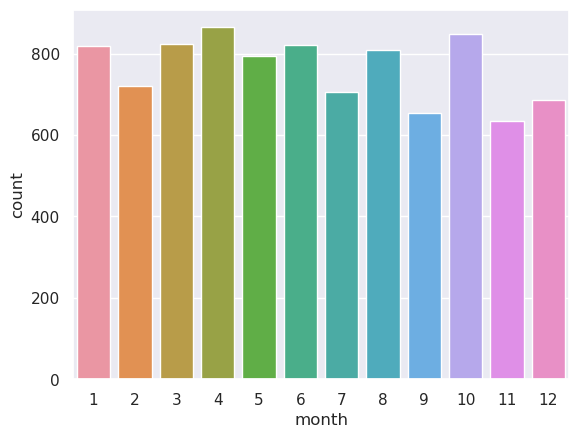

In [ ]:
sns.countplot(data=force_total, x='month');

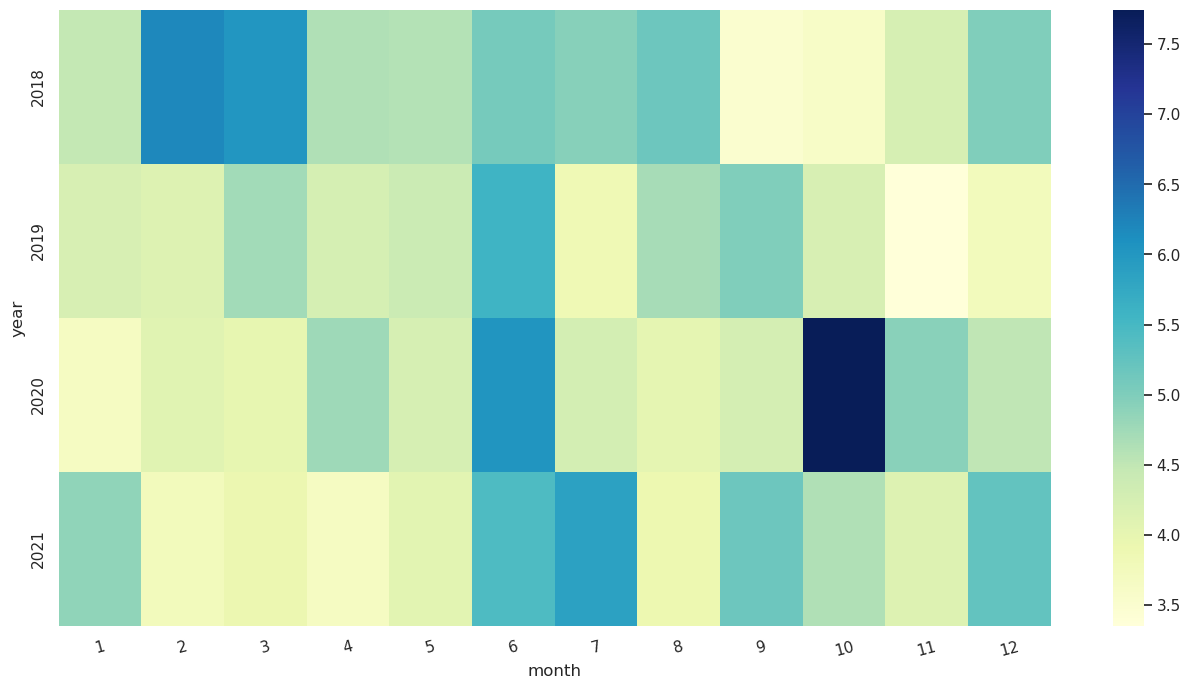

In [ ]:
heatter = pd.pivot_table(force_total,values ='NUM_INVOLVED_TOTAL', index=['year'], columns='month')
fig, ax = plt.subplots(figsize=(16,8))
sns.set()
sns.heatmap(heatter, cmap='YlGnBu')
plt.xticks(rotation=15)
plt.show()

## Modeling

In [ ]:
more_eda = force_total.copy(deep=True) 

In [ ]:
force_total['Received_Force'] = force_total['Received_Force'].astype(int)
force_total['DISCHARGE_OF_FIREARM_INDIVIDUAL'] = force_total['DISCHARGE_OF_FIREARM_INDIVIDUAL'].astype(int)
force_total['Injured'] = force_total['Injured'].astype(int)
force_total['DISCHARGE_OF_FIREARM_INCIDENT'] = force_total['DISCHARGE_OF_FIREARM_INCIDENT'].astype(int)
force_total['ARREST_MADE'] = force_total['ARREST_MADE'].astype(int)

In [ ]:
force_total['Gender'].replace('male', '1',inplace=True)
force_total['Gender'].replace('female', '2',inplace=True)
force_total['Gender'].replace('transgender', '3',inplace=True)
force_total['Civilian_Officer'].replace('Civilian', '0',inplace=True)
force_total['Civilian_Officer'].replace('Officer', '1',inplace=True)

In [ ]:
lst = []
for x in force_total['year']:
    if x == 2021:
        lst.append(1)
    else:
        lst.append(0)
force_total['post_covid'] = lst
more_eda['post_covid'] = lst

In [ ]:
night = []
for x in force_total['hour']:
    if (x>=20) or (x<=2): #22, 6
        night.append(1)
    else:
        night.append(0)
force_total['night'] = night
more_eda['night'] = night

In [ ]:
minor = []
for x in force_total['Race_Ethnic_Group']:
    if x == 'white':
        minor.append(0)
    else:
        minor.append(1)
force_total['POC'] = minor
more_eda['POC'] = minor

In [ ]:
xforce = force_total.copy(deep = True)

In [ ]:
xforce['weekday'] = [x.weekday() for x in xforce['date']]

In [ ]:
xforce.drop(['date','time','INCIDENT_ID','ORI'],axis=1,inplace=True)

In [ ]:
races = ['white', 'hispanic','black','asian','other']

In [ ]:
racess = []
for x in force_total['Race_Ethnic_Group']:
    if x in races:
        racess.append(True)
    else:
        racess.append(False)

In [ ]:
xforce = xforce[racess]
xforcex = xforce.copy(deep=True)
xforcex['Race_Ethnic_Group'].replace('white', 0,inplace=True)
xforcex['Race_Ethnic_Group'].replace('hispanic', 1,inplace=True)
xforcex['Race_Ethnic_Group'].replace('black', 2,inplace=True)
xforcex['Race_Ethnic_Group'].replace('asian', 3,inplace=True)
xforcex['Race_Ethnic_Group'].replace('other', 4,inplace=True)

In [ ]:
xforcex

,Civilian_Officer,Gender,Race_Ethnic_Group,Age,Injured,Received_Force,DISCHARGE_OF_FIREARM_INDIVIDUAL,DISCHARGE_OF_FIREARM_INCIDENT,CITY,COUNTY,...,NUM_INVOLVED_TOTAL,year,month,day,hour,minute,post_covid,night,POC,weekday
0,0,1,2,31_35,1,1,0,0,DUBLIN,ALAMEDA,...,3,2021,1,27,22,35,1,1,1,2
1,1,1,0,41_45,1,1,0,0,DUBLIN,ALAMEDA,...,3,2021,1,27,22,35,1,1,0,2
2,1,1,0,26_30,0,1,0,0,DUBLIN,ALAMEDA,...,3,2021,1,27,22,35,1,1,0,2
3,0,1,2,18_20,1,1,0,0,DUBLIN,ALAMEDA,...,4,2021,11,16,19,0,1,0,1,1
4,1,1,1,26_30,0,1,0,0,DUBLIN,ALAMEDA,...,4,2021,11,16,19,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2236,1,1,0,21_25,0,1,1,1,MARYSVILLE,YUBA,...,6,2018,4,6,2,17,0,1,0,4
2237,1,1,3,31_35,0,1,1,1,MARYSVILLE,YUBA,...,6,2018,4,6,2,17,0,1,1,4
2238,1,2,0,26_30,0,0,0,1,MARYSVILLE,YUBA,...,6,2018,4,6,2,17,0,1,0,4
2239,1,1,0,26_30,0,0,0,1,MARYSVILLE,YUBA,...,6,2018,4,6,2,17,0,1,0,4


In [ ]:
xforcex['Age'].replace('0_9', 0,inplace=True)
xforcex['Age'].replace('10_17', 0,inplace=True)
xforcex['Age'].replace('18_20', 0,inplace=True)
xforcex['Age'].replace('21_25', 0,inplace=True)
xforcex['Age'].replace('26_30', 0,inplace=True)
xforcex['Age'].replace('31_35', 1,inplace=True)
xforcex['Age'].replace('36_40', 1,inplace=True)
xforcex['Age'].replace('41_45', 1,inplace=True)
xforcex['Age'].replace('46_50', 1,inplace=True)
xforcex['Age'].replace('51_55', 1,inplace=True)
xforcex['Age'].replace('56_60', 1,inplace=True)
xforcex['Age'].replace('61_65', 2,inplace=True)
xforcex['Age'].replace('66_70', 2,inplace=True)
xforcex['Age'].replace('71_75', 2,inplace=True)
xforcex['Age'].replace('76_80', 2,inplace=True)
xforcex['Age'].replace('81_85', 2,inplace=True)
xforcex['Age'].replace('86_90', 2,inplace=True)
xforcex['Age'].replace('91_95', 2,inplace=True)
#<30 youth, 30-60 middle aged, >60 senior

In [ ]:
xforcex.drop('STATE', axis=1, inplace=True)

In [ ]:
contact_reason = pd.get_dummies(xforcex['CONTACT_REASON'])
final_df = pd.merge(xforcex, contact_reason, left_index=True, right_index=True)

In [ ]:
final_df.drop('CONTACT_REASON', axis=1, inplace=True)

In [ ]:
print_full(final_df)

,Civilian_Officer,Gender,Race_Ethnic_Group,Age,Injured,Received_Force,DISCHARGE_OF_FIREARM_INDIVIDUAL,DISCHARGE_OF_FIREARM_INCIDENT,CITY,COUNTY,ZIP_CODE,ARREST_MADE,NUM_INVOLVED_CIVILIANS,NUM_INVOLVED_OFFICERS,NUM_INVOLVED_TOTAL,year,month,day,hour,minute,post_covid,night,POC,weekday,ambush,call_for_service,civil_disorder,consensual,in_custody_event,in_progress,pre_planned,vehicle_bike_pedestrian,welfare_check
0,0,1,2,1,1,1,0,0,DUBLIN,ALAMEDA,94568,1,1,2,3,2021,1,27,22,35,1,1,1,2,0,0,0,0,1,0,0,0,0
0,0,1,2,1,1,1,0,0,DUBLIN,ALAMEDA,94568,1,1,2,3,2021,1,27,22,35,1,1,1,2,0,0,0,0,1,0,0,0,0
0,0,1,2,1,1,1,0,0,DUBLIN,ALAMEDA,94568,1,1,2,3,2021,1,27,22,35,1,1,1,2,0,0,0,0,1,0,0,0,0
0,0,1,2,0,0,1,0,0,DUBLIN,ALAMEDA,94568,1,1,2,3,2019,1,6,16,20,0,0,1,6,0,0,0,0,1,0,0,0,0
0,0,1,2,0,0,1,0,0,DUBLIN,ALAMEDA,94568,1,1,2,3,2019,1,6,16,20,0,0,1,6,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2441,1,1,3,1,0,1,0,1,WEST SACRAMENTO,YOLO,95691,0,1,4,5,2020,9,12,2,57,0,1,1,5,1,0,0,0,0,0,0,0,0
2442,1,1,3,1,0,1,0,1,WEST SACRAMENTO,YOLO,95691,0,1,4,5,2020,9,12,2,57,0,1,1,5,1,0,0,0,0,0,0,0,0
2443,1,1,0,1,0,1,0,1,WEST SACRAMENTO,YOLO,95691,0,1,4,5,2020,9,12,2,57,0,1,0,5,1,0,0,0,0,0,0,0,0
2444,0,1,4,0,0,0,0,0,SACRAMENTO,SACRAMENTO,95817,1,1,1,2,2020,6,16,12,24,0,0,1,1,0,1,0,0,0,0,0,0,0


### Random Forest 

In [ ]:
xforce = final_df.drop(['ARREST_MADE', 'CITY', 'COUNTY'],axis=1)
yforce = final_df['ARREST_MADE']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xforce, yforce, test_size=0.33, random_state=42)

In [ ]:
rfc = RandomForestClassifier(max_depth=15, random_state=42) 
rfc.fit(X_train,y_train)
rfc.score(X_test, y_test)

0.978689818468824

In [ ]:
xforce.columns

Index(['Civilian_Officer', 'Gender', 'Race_Ethnic_Group', 'Age', 'Injured',
       'Received_Force', 'DISCHARGE_OF_FIREARM_INDIVIDUAL',
       'DISCHARGE_OF_FIREARM_INCIDENT', 'ZIP_CODE', 'NUM_INVOLVED_CIVILIANS',
       'NUM_INVOLVED_OFFICERS', 'NUM_INVOLVED_TOTAL', 'year', 'month', 'day',
       'hour', 'minute', 'post_covid', 'night', 'POC', 'weekday', 'ambush',
       'call_for_service', 'civil_disorder', 'consensual', 'in_custody_event',
       'in_progress', 'pre_planned', 'vehicle_bike_pedestrian',
       'welfare_check'],
      dtype='object')

## MORE EDA VISUALIZATION WORK

In [ ]:
print_full(more_eda)

,INCIDENT_ID,Civilian_Officer,Gender,Race_Ethnic_Group,Age,Injured,Received_Force,DISCHARGE_OF_FIREARM_INDIVIDUAL,DISCHARGE_OF_FIREARM_INCIDENT,ORI,CITY,COUNTY,STATE,ZIP_CODE,ARREST_MADE,CONTACT_REASON,NUM_INVOLVED_CIVILIANS,NUM_INVOLVED_OFFICERS,NUM_INVOLVED_TOTAL,date,time,year,month,day,hour,minute,post_covid,night,POC
0,URSUS-01-0000-2021-0ce,Civilian,male,black,31_35,True,True,False,False,CA0010000,DUBLIN,ALAMEDA,CA,94568,True,in_custody_event,1,2,3,2021-01-27,22:35:00,2021,1,27,22,35,1,1,1
1,URSUS-01-0000-2021-0ce,Officer,male,white,41_45,True,True,False,False,CA0010000,DUBLIN,ALAMEDA,CA,94568,True,in_custody_event,1,2,3,2021-01-27,22:35:00,2021,1,27,22,35,1,1,0
2,URSUS-01-0000-2021-0ce,Officer,male,white,26_30,False,True,False,False,CA0010000,DUBLIN,ALAMEDA,CA,94568,True,in_custody_event,1,2,3,2021-01-27,22:35:00,2021,1,27,22,35,1,1,0
3,URSUS-01-0000-2021-0e4,Civilian,male,black,18_20,True,True,False,False,CA0010000,DUBLIN,ALAMEDA,CA,94568,True,in_custody_event,1,3,4,2021-11-16,19:00:00,2021,11,16,19,0,1,0,1
4,URSUS-01-0000-2021-0e4,Officer,male,hispanic,26_30,False,True,False,False,CA0010000,DUBLIN,ALAMEDA,CA,94568,True,in_custody_event,1,3,4,2021-11-16,19:00:00,2021,11,16,19,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2236,URSUS-58-0000-2018-598,Officer,male,white,21_25,False,True,True,True,CA0580000,MARYSVILLE,YUBA,CA,95901,False,vehicle_bike_pedestrian,1,5,6,2018-04-06,02:17:00,2018,4,6,2,17,0,1,0
2237,URSUS-58-0000-2018-598,Officer,male,asian,31_35,False,True,True,True,CA0580000,MARYSVILLE,YUBA,CA,95901,False,vehicle_bike_pedestrian,1,5,6,2018-04-06,02:17:00,2018,4,6,2,17,0,1,1
2238,URSUS-58-0000-2018-598,Officer,female,white,26_30,False,False,False,True,CA0580000,MARYSVILLE,YUBA,CA,95901,False,vehicle_bike_pedestrian,1,5,6,2018-04-06,02:17:00,2018,4,6,2,17,0,1,0
2239,URSUS-58-0000-2018-598,Officer,male,white,26_30,False,False,False,True,CA0580000,MARYSVILLE,YUBA,CA,95901,False,vehicle_bike_pedestrian,1,5,6,2018-04-06,02:17:00,2018,4,6,2,17,0,1,0


In [ ]:
more_eda = more_eda.reset_index()

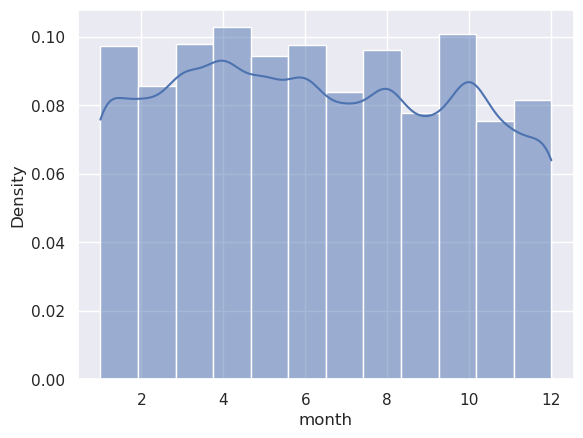

In [ ]:
sns.histplot(data=more_eda, x='month',stat='density',bins=12, kde = True);

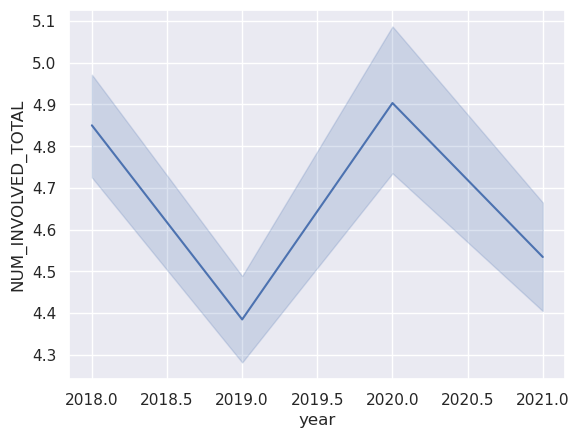

In [ ]:
sns.lineplot(data=more_eda, x = 'year', y='NUM_INVOLVED_TOTAL');

In [ ]:
more_eda['cat_age'] = more_eda['Age']
more_eda['cat_age'].replace('0_9', 'youth',inplace=True)
more_eda['cat_age'].replace(0, 'youth',inplace=True)
more_eda['cat_age'].replace('10_17', 'youth',inplace=True)
more_eda['cat_age'].replace('18_20', 'youth',inplace=True)
more_eda['cat_age'].replace('21_25', 'youth',inplace=True)
more_eda['cat_age'].replace('26_30', 'youth',inplace=True)
more_eda['cat_age'].replace('31_35', 'middle_age',inplace=True)
more_eda['cat_age'].replace('36_40', 'middle_age',inplace=True)
more_eda['cat_age'].replace('41_45', 'middle_age',inplace=True)
more_eda['cat_age'].replace('46_50', 'middle_age',inplace=True)
more_eda['cat_age'].replace('51_55', 'middle_age',inplace=True)
more_eda['cat_age'].replace('56_60', 'middle_age',inplace=True)
more_eda['cat_age'].replace('61_65', 'senior',inplace=True)
more_eda['cat_age'].replace('66_70', 'senior',inplace=True)
more_eda['cat_age'].replace('71_75', 'senior',inplace=True)
more_eda['cat_age'].replace('76_80', 'senior',inplace=True)
more_eda['cat_age'].replace('81_85', 'senior',inplace=True)
more_eda['cat_age'].replace('86_90', 'senior',inplace=True)
more_eda['cat_age'].replace('91_95', 'senior',inplace=True)

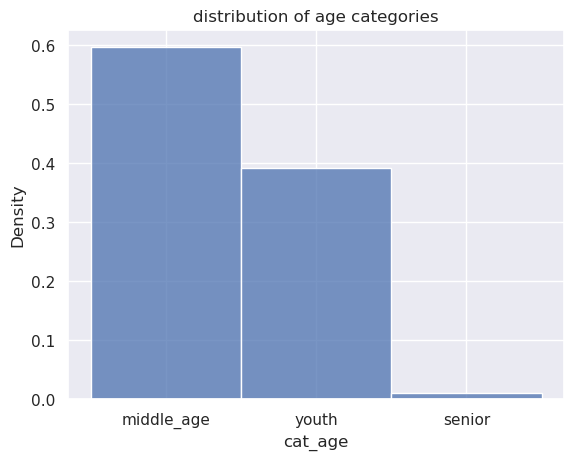

In [ ]:
sns.histplot(data=more_eda, x='cat_age',stat='density').set(title='distribution of age categories');

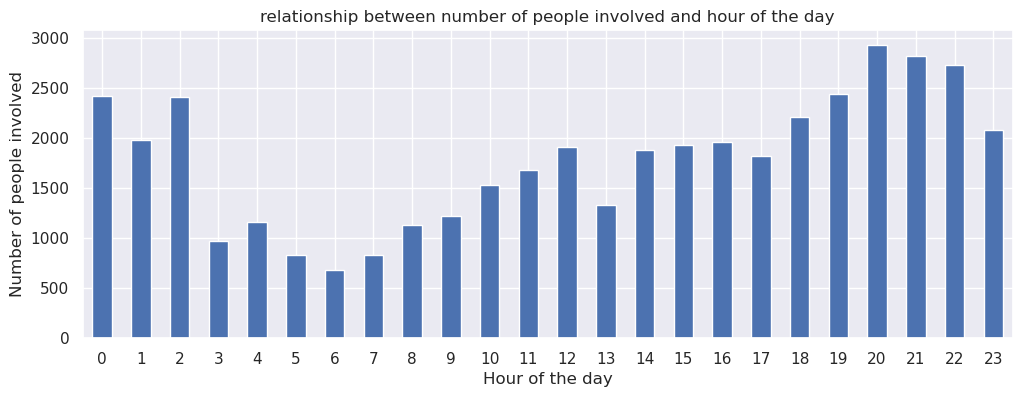

In [ ]:
fig, axs = plt.subplots(figsize=(12, 4))

more_eda.groupby(['hour'])["NUM_INVOLVED_TOTAL"].sum().plot(
    kind='bar', rot=0, ax=axs
)


plt.xlabel("Hour of the day");  # custom x label using Matplotlib
plt.title("relationship between number of people involved and hour of the day")
plt.ylabel("Number of people involved");

In [ ]:
races = ['white', 'hispanic','black','asian','other']
racess = []
for x in more_eda['Race_Ethnic_Group']:
    if x in races:
        racess.append(True)
    else:
        racess.append(False)
more_eda = more_eda[racess]
xforcex = more_eda.copy(deep=True)
xforcex['Race_Ethnic_Group'].replace('white', 0,inplace=True)
xforcex['Race_Ethnic_Group'].replace('hispanic', 1,inplace=True)
xforcex['Race_Ethnic_Group'].replace('black', 2,inplace=True)
xforcex['Race_Ethnic_Group'].replace('asian', 3,inplace=True)
xforcex['Race_Ethnic_Group'].replace('other', 4,inplace=True)

Text(0.5, 1.0, 'categorizing arrest by race')

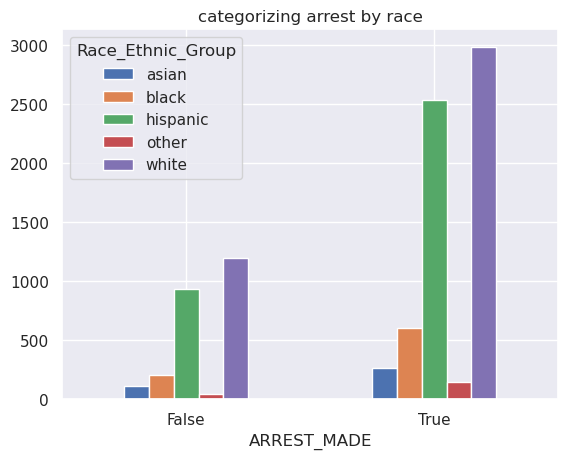

In [ ]:
crosstb = pd.crosstab(more_eda.ARREST_MADE, more_eda.Race_Ethnic_Group)
barplot = crosstb.plot.bar(rot=0)
plt.title('categorizing arrest by race')

In [ ]:
more_eda['weekday'] = [x.weekday() for x in more_eda['date']]

In [ ]:
import ipywidgets as widgets
categorical_columns = ['Gender', 'ARREST_MADE', 'Injured','Civilian_Officer','Race_Ethnic_Group','Received_Force','DISCHARGE_OF_FIREARM_INDIVIDUAL','DISCHARGE_OF_FIREARM_INCIDENT','year','cat_age','CONTACT_REASON','weekday']
dd = widgets.Dropdown(
    options = categorical_columns, 
    value = categorical_columns[0],
    description = 'select a column'
)
def draw_countplot(column):
    p = sns.countplot(data=more_eda, x=column).set(title='barplot')
    if len(more_eda[column].unique()) > 4:
        plt.tick_params(axis='x', rotation=90)
        
widgets.interact(draw_countplot, column = dd)





interactive(children=(Dropdown(description='select a column', options=('Gender', 'ARREST_MADE', 'Injured', 'Ci…

<function __main__.draw_countplot(column)>

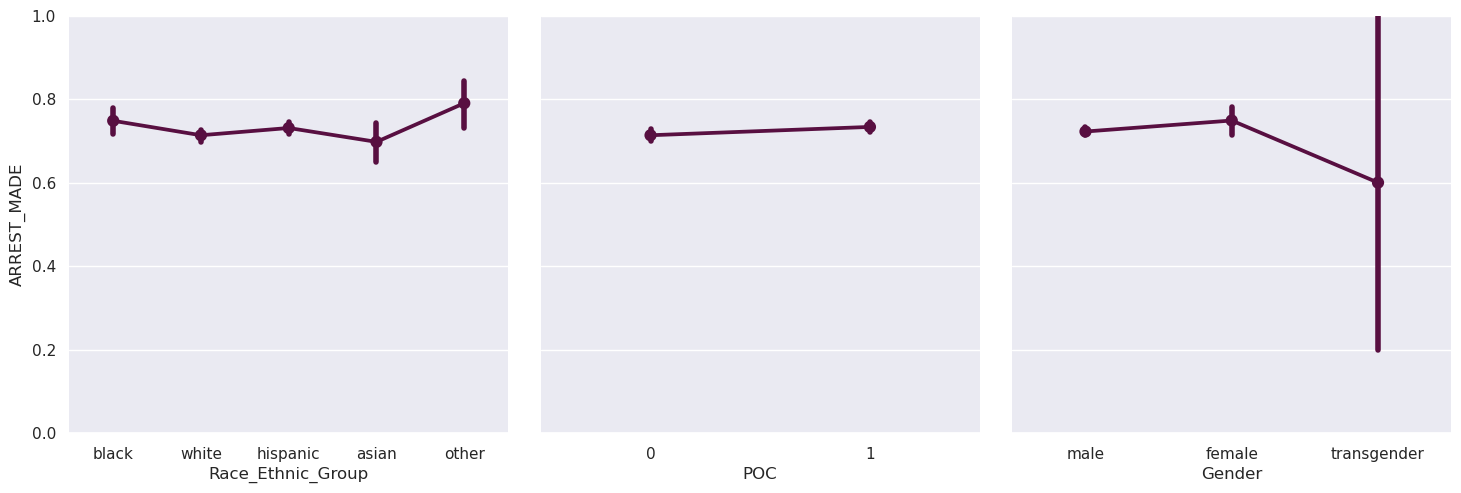

In [ ]:
g = sns.PairGrid(more_eda, y_vars="ARREST_MADE",
                 x_vars=["Race_Ethnic_Group",'POC','Gender'],
                 height=5, aspect=1)

g.map(sns.pointplot, scale=1, errwidth=4, color="xkcd:plum")
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

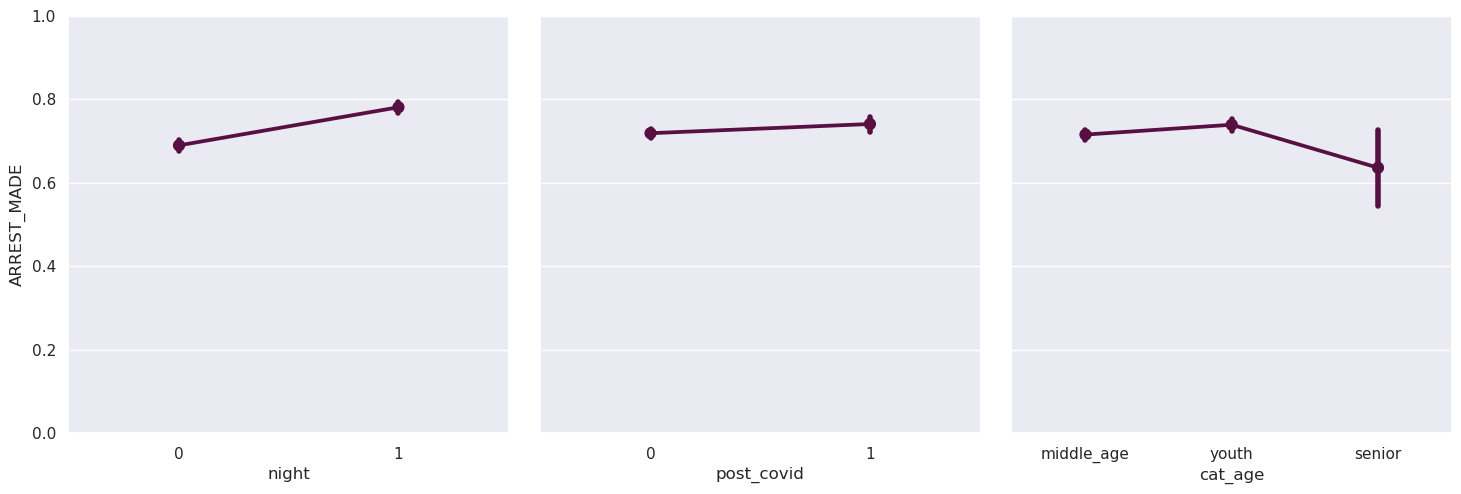

In [ ]:
g = sns.PairGrid(more_eda, y_vars="ARREST_MADE",
                 x_vars=["night",'post_covid','cat_age'],
                 height=5, aspect=1)
g.map(sns.pointplot, scale=1, errwidth=4, color="xkcd:plum")
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

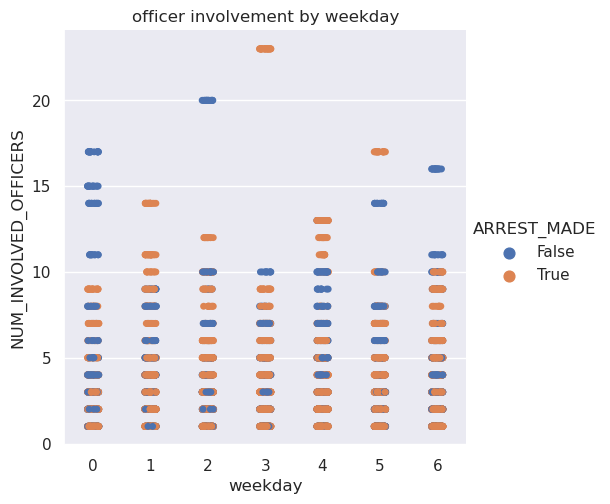

In [ ]:
sns.catplot(data=more_eda, x="weekday", y="NUM_INVOLVED_OFFICERS", hue='ARREST_MADE').set(title='officer involvement by weekday')

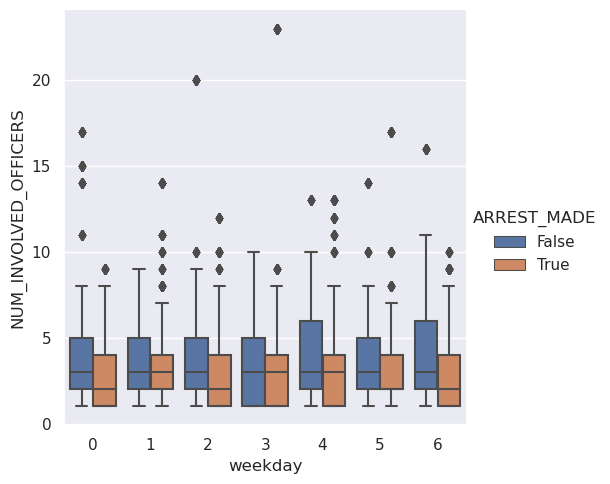

In [ ]:
sns.catplot(data=more_eda, x="weekday", y="NUM_INVOLVED_OFFICERS", hue="ARREST_MADE", kind="box")

In [ ]:
mdf = more_eda.copy(deep=True)
mdf["date"]=pd.to_datetime(mdf["date"])

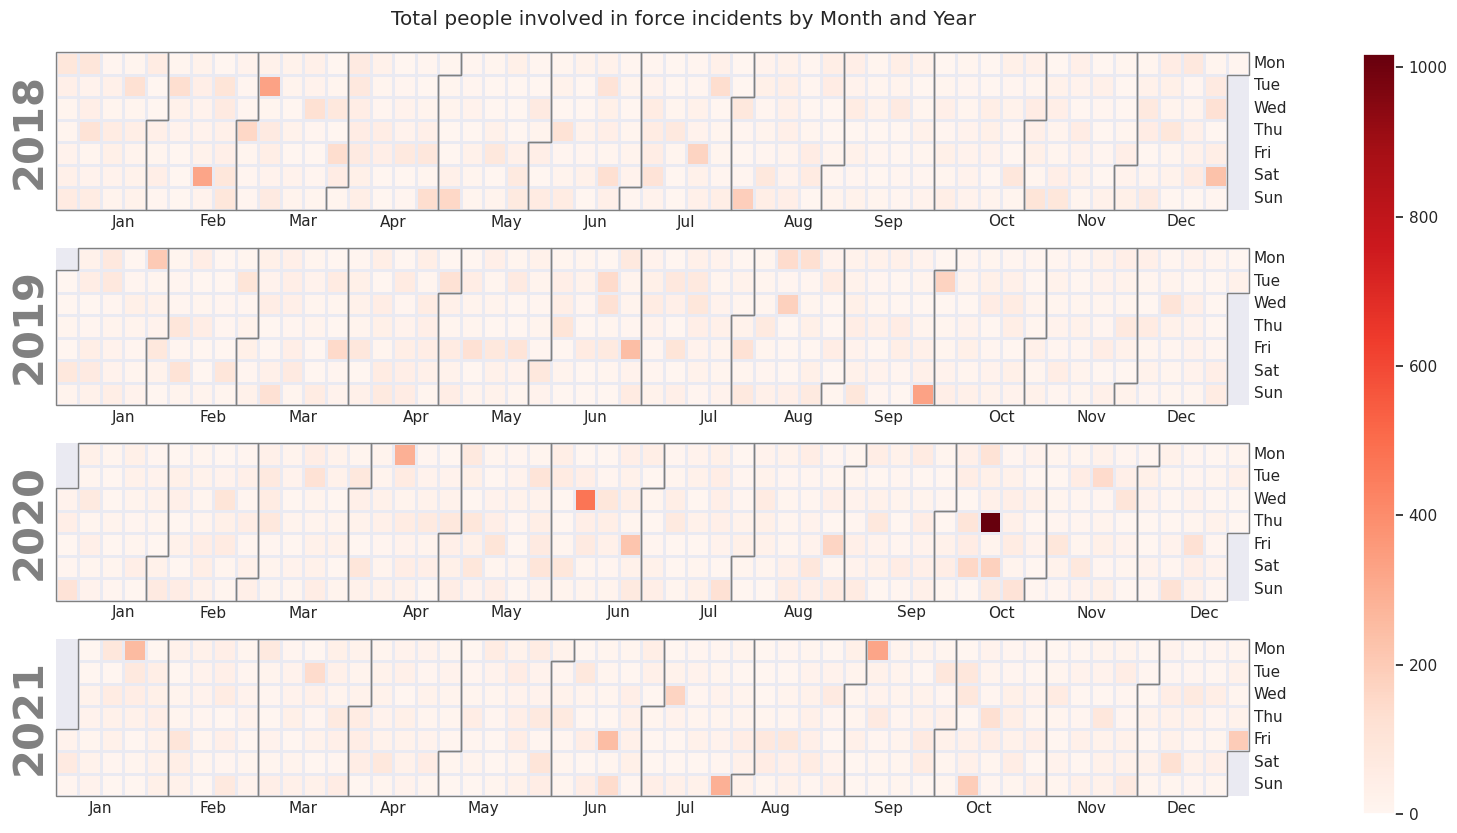

In [ ]:
!pip install calplot
mdf.set_index('date', inplace = True)
import calplot
pl1 = calplot.calplot(data = mdf['NUM_INVOLVED_TOTAL'],how = 'sum', cmap = 'Reds', 
                      figsize = (16, 8), suptitle = "Total people involved in force incidents by Month and Year")

## testing random forest on a whole new set of data 

In [ ]:
force16 = pd.read_csv('force2016.csv')
civforce16 = pd.read_csv('civforce2016.csv')

In [ ]:
force16.drop('In_Custody_Reason', axis=1, inplace=True)
force16.drop(['Crime_Report_Filed','On_K12_Campus','Multiple_Locations'], axis=1, inplace=True)
    

In [ ]:
civforce16 = civforce16[['Incident_ID','Civilian_Officer','ORI','Gender','Race_Ethnic_Group','Age',
                         'Injured','Received_Force', 'DISCHARGE_OF_FIREARM_INDIVIDUAL','DISCHARGE_OF_FIREARM_INCIDENT']]
cfo16 = civforce16.copy(deep=True)
cfo16.drop('ORI', axis=1, inplace=True)
cforce16 = cfo16


In [ ]:
total16 = cforce16.merge(force16, on = 'Incident_ID')
force_total16 = total16.fillna(0)

In [ ]:
force_total16['NUM_INVOLVED_TOTAL'] = force_total16['Num_Involved_Civilians'] + force_total16['Num_Involved_Officers']
force_total16['date'] = pd.to_datetime(force_total16['Incident_Date_Str']).dt.date
force_total16['time'] = pd.to_datetime(force_total16['Incident_Time_Str']).dt.time
force_total16['year'] = [x.year for x in force_total16['date']]
force_total16['month'] = [x.month for x in force_total16['date']]
force_total16['day'] = [x.day for x in force_total16['date']]
force_total16['hour'] = [x.hour for x in force_total16['time']]
force_total16['minute'] = [x.minute for x in force_total16['time']]
force_total16.drop(['Incident_Date_Str','Incident_Time_Str'],axis=1,inplace=True)

In [ ]:
force_total16['Received_Force'] = force_total16['Received_Force'].astype(int)
force_total16['DISCHARGE_OF_FIREARM_INDIVIDUAL'] = force_total16['DISCHARGE_OF_FIREARM_INDIVIDUAL'].astype(int)
force_total16['Injured'] = force_total16['Injured'].astype(int)
force_total16['DISCHARGE_OF_FIREARM_INCIDENT'] = force_total16['DISCHARGE_OF_FIREARM_INCIDENT'].astype(int)
force_total16['Arrest_Made'] = force_total16['Arrest_Made'].astype(int)
force_total16['Gender'].replace('Male', '1',inplace=True)
force_total16['Gender'].replace('Female', '2',inplace=True)
force_total16['Gender'].replace('Transgender', '3',inplace=True)
force_total16['Civilian_Officer'].replace('Civilian', '0',inplace=True)
force_total16['Civilian_Officer'].replace('Officer', '1',inplace=True)
lst = []
for x in force_total16['year']:
    if x == 2021:
        lst.append(1)
    else:
        lst.append(0)
force_total16['post_covid'] = lst
night = []
for x in force_total16['hour']:
    if (x>=22) or (x<=6):
        night.append(1)
    else:
        night.append(0)
force_total16['night'] = night
minor = []
for x in force_total16['Race_Ethnic_Group']:
    if x == 'white':
        minor.append(0)
    else:
        minor.append(1)
force_total16['POC'] = minor

In [ ]:
xforce16 = force_total16.copy(deep = True)
xforce16['weekday'] = [x.weekday() for x in xforce16['date']]
xforce16.drop(['date','time','Incident_ID','ORI'],axis=1,inplace=True)
races = ['White', 'Hispanic','Black','Asian / Pacific Islander','Other']
racess = []
for x in xforce16['Race_Ethnic_Group']:
    if x in races:
        racess.append(True)
    else:
        racess.append(False)
xforce16 = xforce16[racess]
xforcex16 = xforce16.copy(deep=True)
xforcex16['Race_Ethnic_Group'].replace('White', 0,inplace=True)
xforcex16['Race_Ethnic_Group'].replace('Hispanic', 1,inplace=True)
xforcex16['Race_Ethnic_Group'].replace('Black', 2,inplace=True)
xforcex16['Race_Ethnic_Group'].replace('Asian / Pacific Islander', 3,inplace=True)
xforcex16['Race_Ethnic_Group'].replace('Other', 4,inplace=True)
xforcex16

,Civilian_Officer,Gender,Race_Ethnic_Group,Age,Injured,Received_Force,DISCHARGE_OF_FIREARM_INDIVIDUAL,DISCHARGE_OF_FIREARM_INCIDENT,City,County,...,NUM_INVOLVED_TOTAL,year,month,day,hour,minute,post_covid,night,POC,weekday
0,0,1,0,21-25,1,1,0,0,Hayward,Alameda County,...,3,2016,7,3,0,0,0,1,1,6
1,1,1,3,51-55,1,1,0,0,Hayward,Alameda County,...,3,2016,7,3,0,0,0,1,1,6
2,1,1,1,36-40,1,1,0,0,Hayward,Alameda County,...,3,2016,7,3,0,0,0,1,1,6
3,0,2,0,36-40,1,1,0,0,San Leandro,Alameda County,...,2,2016,11,20,0,0,0,1,1,6
4,1,1,1,36-40,0,0,0,0,San Leandro,Alameda County,...,2,2016,11,20,0,0,0,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2556,1,1,0,26-30,0,1,0,1,Olivehurst,Yuba County,...,3,2016,11,3,0,0,0,1,1,3
2557,1,1,0,31-35,0,1,0,1,Olivehurst,Yuba County,...,3,2016,11,3,0,0,0,1,1,3
2558,0,1,2,18-20,1,1,0,0,Marysville,Yuba County,...,3,2016,7,4,0,0,0,1,1,0
2559,1,1,2,26-30,1,1,0,0,Marysville,Yuba County,...,3,2016,7,4,0,0,0,1,1,0


In [ ]:
xforcex16['Age'].replace('0-9', 0,inplace=True)
xforcex16['Age'].replace('10-17', 0,inplace=True)
xforcex16['Age'].replace('18-20', 0,inplace=True)
xforcex16['Age'].replace('21-25', 0,inplace=True)
xforcex16['Age'].replace('26-30', 0,inplace=True)
xforcex16['Age'].replace('31-35', 1,inplace=True)
xforcex16['Age'].replace('36-40', 1,inplace=True)
xforcex16['Age'].replace('41-45', 1,inplace=True)
xforcex16['Age'].replace('46-50', 1,inplace=True)
xforcex16['Age'].replace('51-55', 1,inplace=True)
xforcex16['Age'].replace('56-60', 1,inplace=True)
xforcex16['Age'].replace('61-65', 2,inplace=True)
xforcex16['Age'].replace('66-70', 2,inplace=True)
xforcex16['Age'].replace('71-75', 2,inplace=True)
xforcex16['Age'].replace('76-80', 2,inplace=True)
xforcex16['Age'].replace('81-85', 2,inplace=True)
xforcex16['Age'].replace('86-90', 2,inplace=True)
xforcex16['Age'].replace('91-95', 2,inplace=True)
#<30 youth, 30-60 middle aged, >60 senior
xforcex16.drop('State', axis=1, inplace=True)
contact_reason16 = pd.get_dummies(xforcex16['Contact_Reason'])
final_df16 = pd.merge(xforcex16, contact_reason16, left_index=True, right_index=True)
final_df16.drop('Contact_Reason', axis=1, inplace=True)

In [ ]:
final_df16 = final_df16[final_df16.Age != "17-Oct"]

In [ ]:
final_df16.rename({'Num_Involved_Civilians':'NUM_INVOLVED_CIVILIANS'}, axis=1, inplace=True)
final_df16.rename({'Num_Involved_Officers':'NUM_INVOLVED_OFFICERS'}, axis=1, inplace=True)
final_df16.rename({'Zip_Code':'ZIP_CODE'}, axis=1, inplace=True)
final_df16.rename({'Arrest_Made':'ARREST_MADE'}, axis=1, inplace=True)
final_df16.rename({'Ambush - No warning':'ambush'}, axis=1, inplace=True)
final_df16.rename({'Call for Service':'call_for_service'}, axis=1, inplace=True)

In [ ]:
final_df16.rename({'Consensual Encounter / Public Contact / Flag Down':'consensual'}, axis=1, inplace=True)
final_df16.rename({'Civil Assembly':'civil_disorder'}, axis=1, inplace=True)

final_df16.rename({'In Custody Event':'in_custody_event'}, axis=1, inplace=True)
final_df16.rename({'Pre-Planned Activity (arrest/search warrant, parole/probation search)':'pre_planned'}, axis=1, inplace=True)



In [ ]:
final_df16.rename({'Crime in Progress / Investigating Suspicious Persons or Circumstances':'in_progress'}, axis=1, inplace=True)
final_df16.rename({'Vehicle / Bike / Pedestrian Stop':'vehicle_bike_pedestrian'}, axis=1, inplace=True)
final_df16.rename({'Welfare Check':'welfare_check'}, axis=1, inplace=True)



In [ ]:
xforce16 = final_df16.drop(['ARREST_MADE', 'City', 'County'],axis=1)
yforce16 = final_df16['ARREST_MADE']
rfc.score(xforce16, yforce16)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


0.7710794297352342